Learned weight vector: [0.2674635  0.14053265 0.14059704 0.79034413 0.02357913 0.7181425
 0.38775291]
Learning rate: 0.01
Cost on test data: 0.4321581510053564


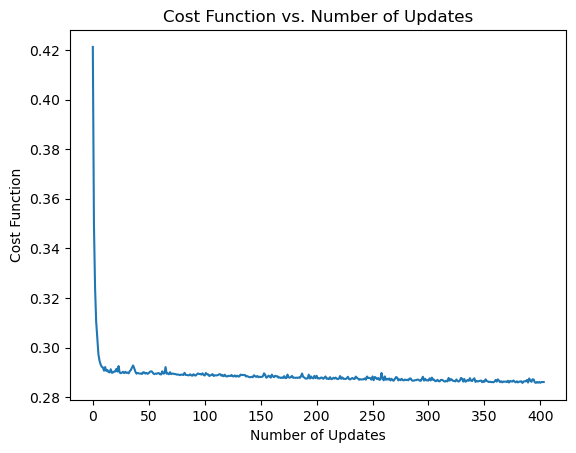

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv('Dataset/train.csv', header=None)
test_data = pd.read_csv('Dataset/test.csv', header=None)

# Separate features and target variables
X_train = train_data.iloc[:, :-1].values  # All columns except the last for features
y_train = train_data.iloc[:, -1].values   # Last column for the target variable

X_test = test_data.iloc[:, :-1].values    # All columns except the last for features
y_test = test_data.iloc[:, -1].values     # Last column for the target variable

# Normalize the features
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

X_train = normalize_features(X_train)
X_test = normalize_features(X_test)

# Initialize variables
num_samples, num_features = X_train.shape
w = np.zeros(num_features)  # Initialize weights to zeros
tolerance = 1e-6  # Tolerance for convergence
max_updates = 1000  # Maximum number of updates (adjust as needed)
cost_values = []  # List to store cost values

# Define the cost function (Mean Squared Error)
def calculate_cost(X, y, w):
    m = len(y)
    predictions = np.dot(X, w)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Implement Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, w, learning_rate):
    m = len(y)
    indices = np.arange(m)
    np.random.shuffle(indices)  # Randomly shuffle the indices
    for i in indices:
        xi = X[i]  # Properly index the features
        yi = y[i]
        prediction = np.dot(xi, w)
        error = prediction - yi
        gradient = xi * error
        w -= learning_rate * gradient  # Update weights using stochastic gradient
    return w

# Stochastic Gradient Descent to find optimal weights
learning_rate = 0.01  # Initial learning rate (adjust as needed)

for update in range(max_updates):
    # Calculate current cost
    current_cost = calculate_cost(X_train, y_train, w)
    cost_values.append(current_cost)
    
    # Update weights using stochastic gradient descent
    w = stochastic_gradient_descent(X_train, y_train, w, learning_rate)
    
    # Check for convergence based on the cost function
    if update > 0 and abs(cost_values[update] - cost_values[update - 1]) < tolerance:
        break

# Calculate cost on test data using the learned weight vector
test_cost = calculate_cost(X_test, y_test, w)

# Print learned weight vector and learning rate
print("Learned weight vector:", w)
print("Learning rate:", learning_rate)
print("Cost on test data:", test_cost)

# Plot cost function vs. updates
plt.plot(cost_values)
plt.xlabel('Number of Updates')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Number of Updates')
plt.show()


In [36]:
# 4c
X_train_with_bias = np.column_stack((np.ones(len(X_train)), X_train))

# Calculate the optimal weight vector using the normal equation
w_optimal = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train

print("Optimal weight vector (analytical):", w_optimal)


Optimal weight vector (analytical): [-0.00557469  0.86983813  0.78109748  0.86449324  1.2792889   0.11558646
  1.56826654  1.0888816 ]
